# Walmart - Confidence Interval and CLT

## Defining Problem Statement and Analyzing basic metrics

**Problem Statement-** The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Basic Metrics to be analyzed:
- Average amount purchased
- Doing a normal distribution for various columns
- Data Vizualizations for columns

### Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [ ]:
!gdown 1lBL6bC6RVcVGfPmccUja1T_2WagIkcr5

Downloading...
From: https://drive.google.com/uc?id=1lBL6bC6RVcVGfPmccUja1T_2WagIkcr5
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 68.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [ ]:
df = pd.read_csv('walmart_data.csv')

In [ ]:
df.shape

(550068, 10)

**Insight:** There are 550068 rows and 10 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Detection of null values and outliers.

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insight** There are no null values present in the dataset.

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


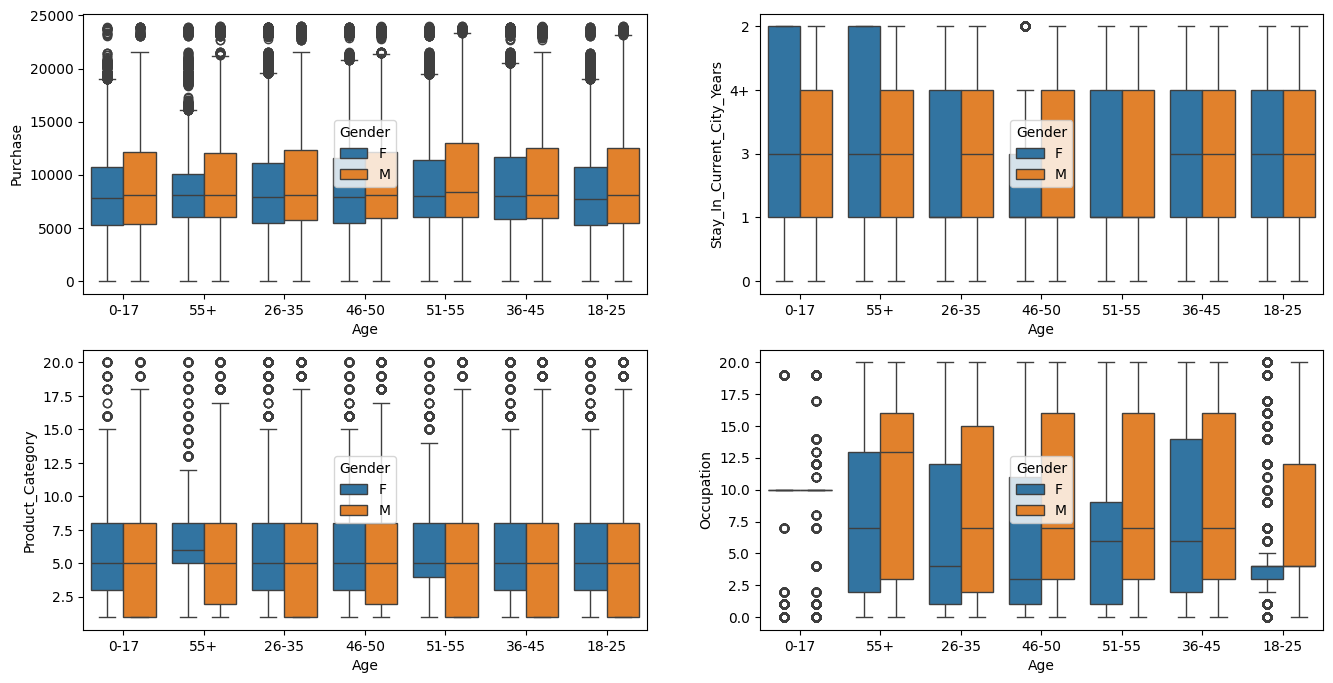

In [ ]:
columns = ['Purchase', 'Stay_In_Current_City_Years', 'Product_Category', 'Occupation']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8))
for i, column in enumerate(columns):
  row = i//2
  col = i%2
  sns.boxplot(data = df, x = 'Age', y = column, hue = 'Gender', ax = axes[row,col])
plt.show()

**Insight:** The above graphs show the outliers across various categories using gender as differentiator.

In [ ]:
def outliers(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  outlier = df[(df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))]
  return outlier

In [ ]:
out = outliers(df['Purchase'])
print(f'The max value of outlier is: ', out.max())
print(f'The min value of outlier is: ', out.min())

The max value of outlier is:  23961
The min value of outlier is:  21401


**Insight:** _Pandas_ has in-built function **_quantile_** to find the quartiles of the data and then calculate outliers using the statistic formula.

In [ ]:
numeric_data = df[['Purchase', 'Product_Category', 'Marital_Status', 'Occupation']]
percentile_5 = np.percentile(numeric_data, 5)
percentile_95 = np.percentile(numeric_data, 95)
clipped_data = np.clip(numeric_data, percentile_5, percentile_95)
clipped_data.head()

,Purchase,Product_Category,Marital_Status,Occupation
0,8370,3,0,10
1,15165,1,0,10
2,1422,12,0,10
3,1057,12,0,10
4,7969,8,0,16


**Insight:** We use the _np.clip()_ function to clean the data.

### Data Vizualization

#### Univariate Visual Analysis

How many purchases are made according to the amount of purchase?

[]

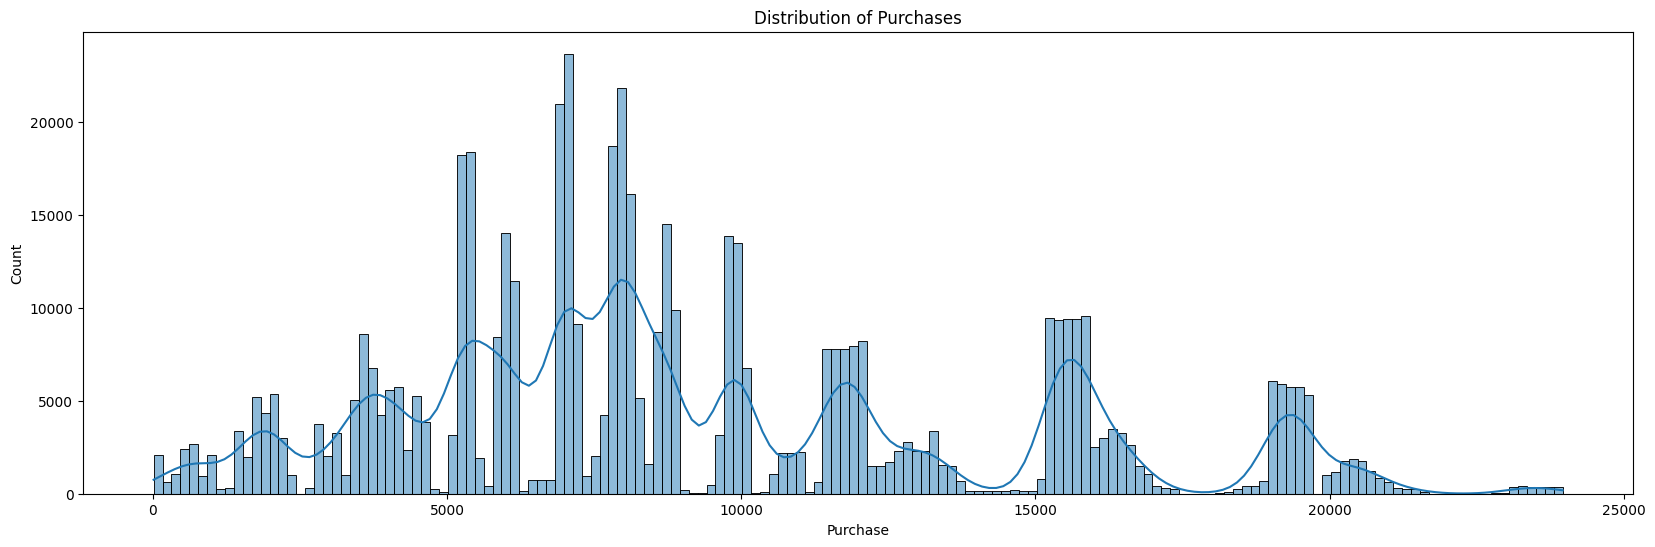

In [ ]:
plt.figure(figsize = (20,6))
sns.histplot(data = df, x = 'Purchase', kde = True)
plt.title('Distribution of Purchases')
plt.plot()

[]

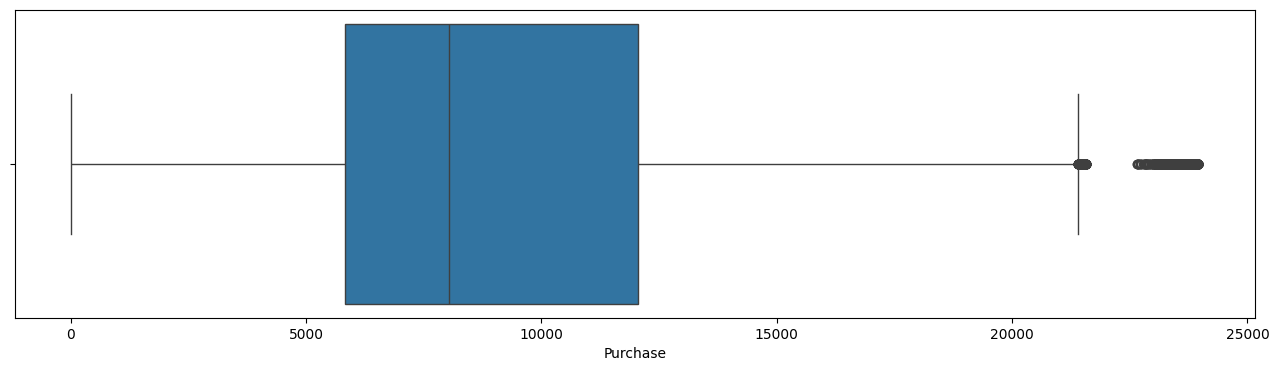

In [ ]:
plt.figure(figsize = (16,4))
sns.boxplot(data = df, x = 'Purchase', orient = 'h')
plt.plot()

**Insight:** The two graphs, _histogram_ and _box plot_ to see the distribution of the dataset across Purchase column of dataset.

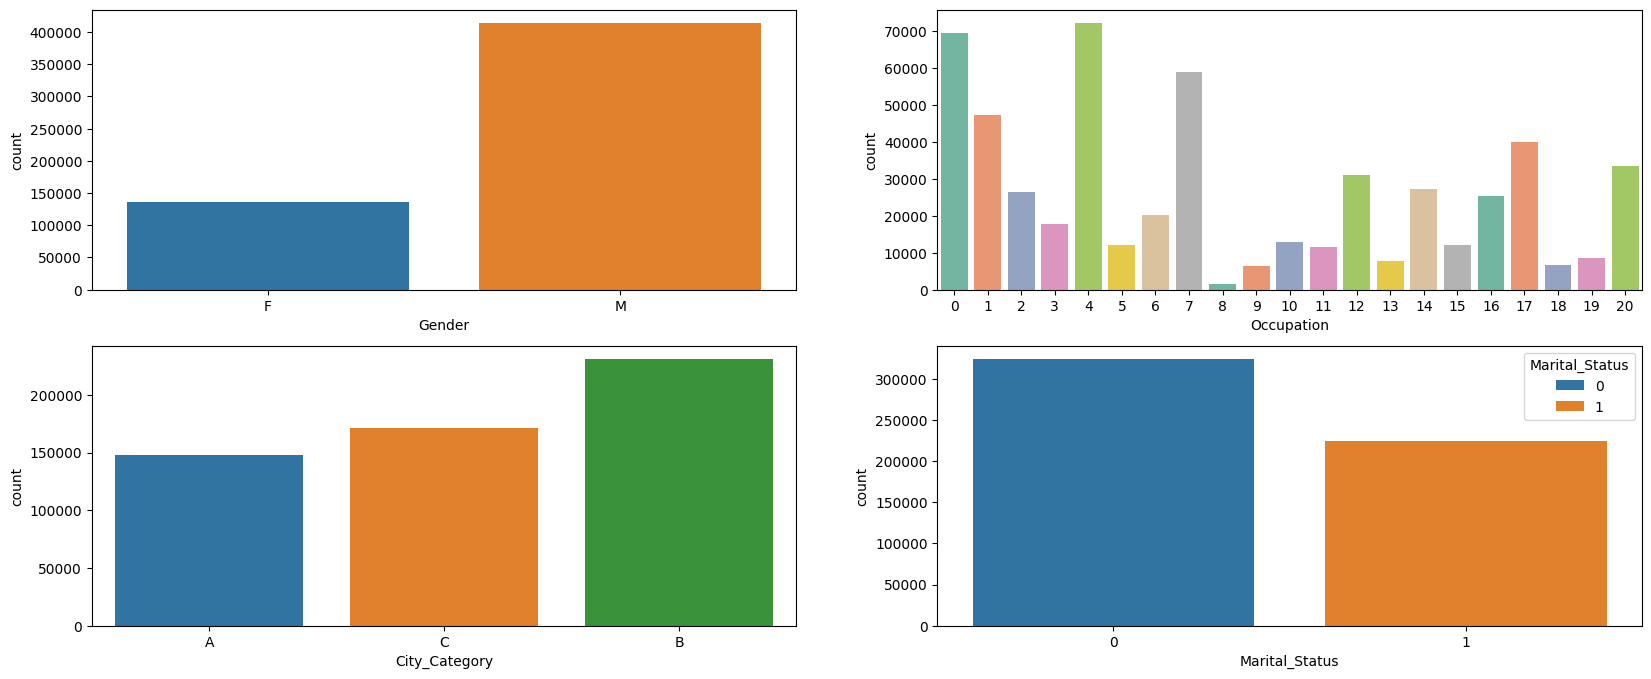

In [ ]:
# for categorical columns let's use countplot
colors = sns.color_palette('Set2', n_colors = len(df['Occupation'].unique()))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
sns.countplot(data=df, x='Gender', hue = 'Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', hue = 'Occupation', palette = colors, ax=axs[0,1], legend = False)
sns.countplot(data=df, x='City_Category', hue = 'City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', hue = 'Marital_Status', ax=axs[1,1])
plt.show()

**Insight:** We use the count plot to see the difference between various categories of respective columns such as **Gender**, **City_Category**, **Marital_Status** and **Occupation**.

What products are different age groups buying?

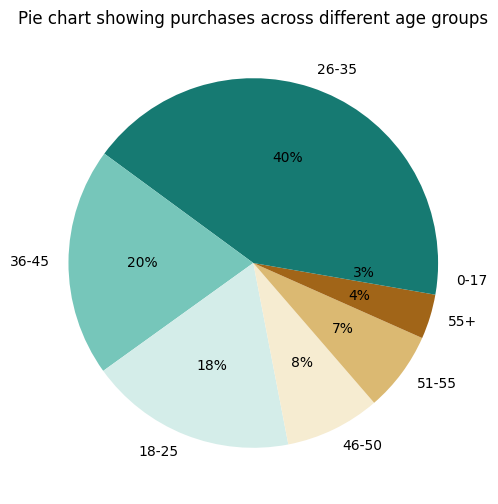

In [ ]:
plt.figure(figsize = (26,6))
data = df.Age.value_counts(normalize = True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x = data.values, labels = data.index, autopct = '%.0f%%', colors = palette_color)
plt.title('Pie chart showing purchases across different age groups')
plt.show()

**Insight:** The above `pie chart` shows us how many products each age group has bought. It can help the company in targeting age groups.

#### Bivariate Analysis

Is there a relationship between age, marital status, and the amount spent?

[]

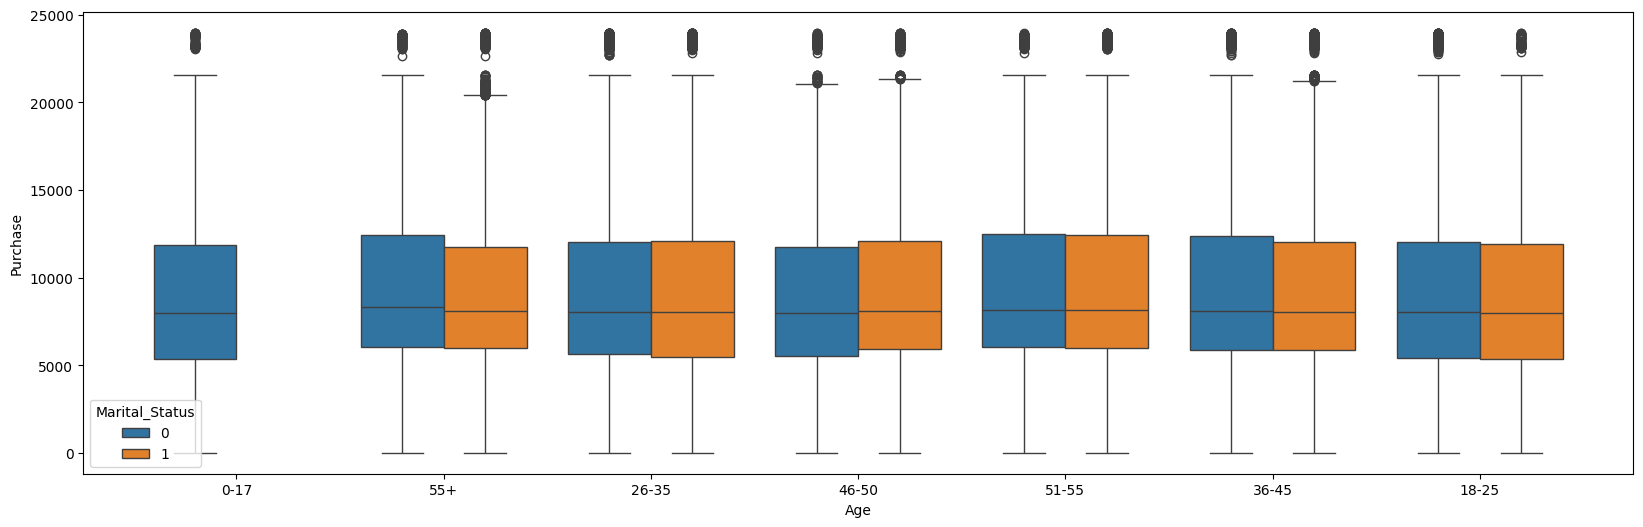

In [ ]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Marital_Status')
plt.plot()

**Insight:** Here we use boxplot with Age v/s Purchase to show analysis between two columns.

Are there preferred product categories for different genders?

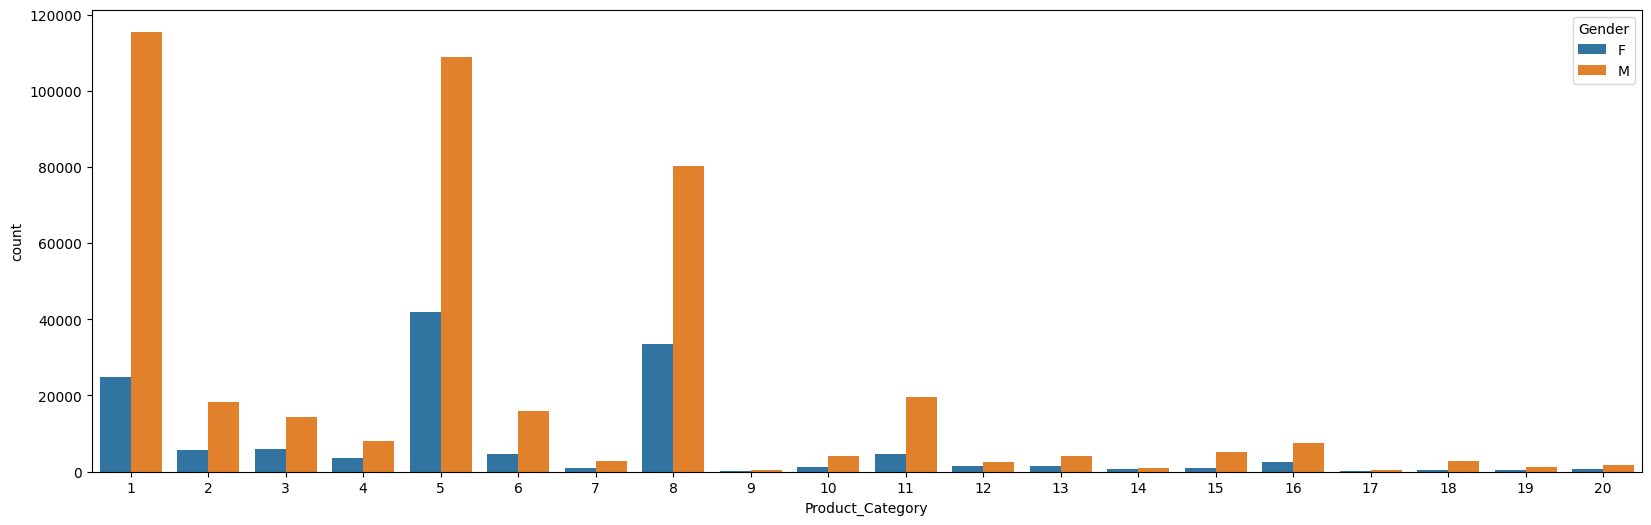

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(data = df, x = 'Product_Category', hue = 'Gender')
plt.show()

[]

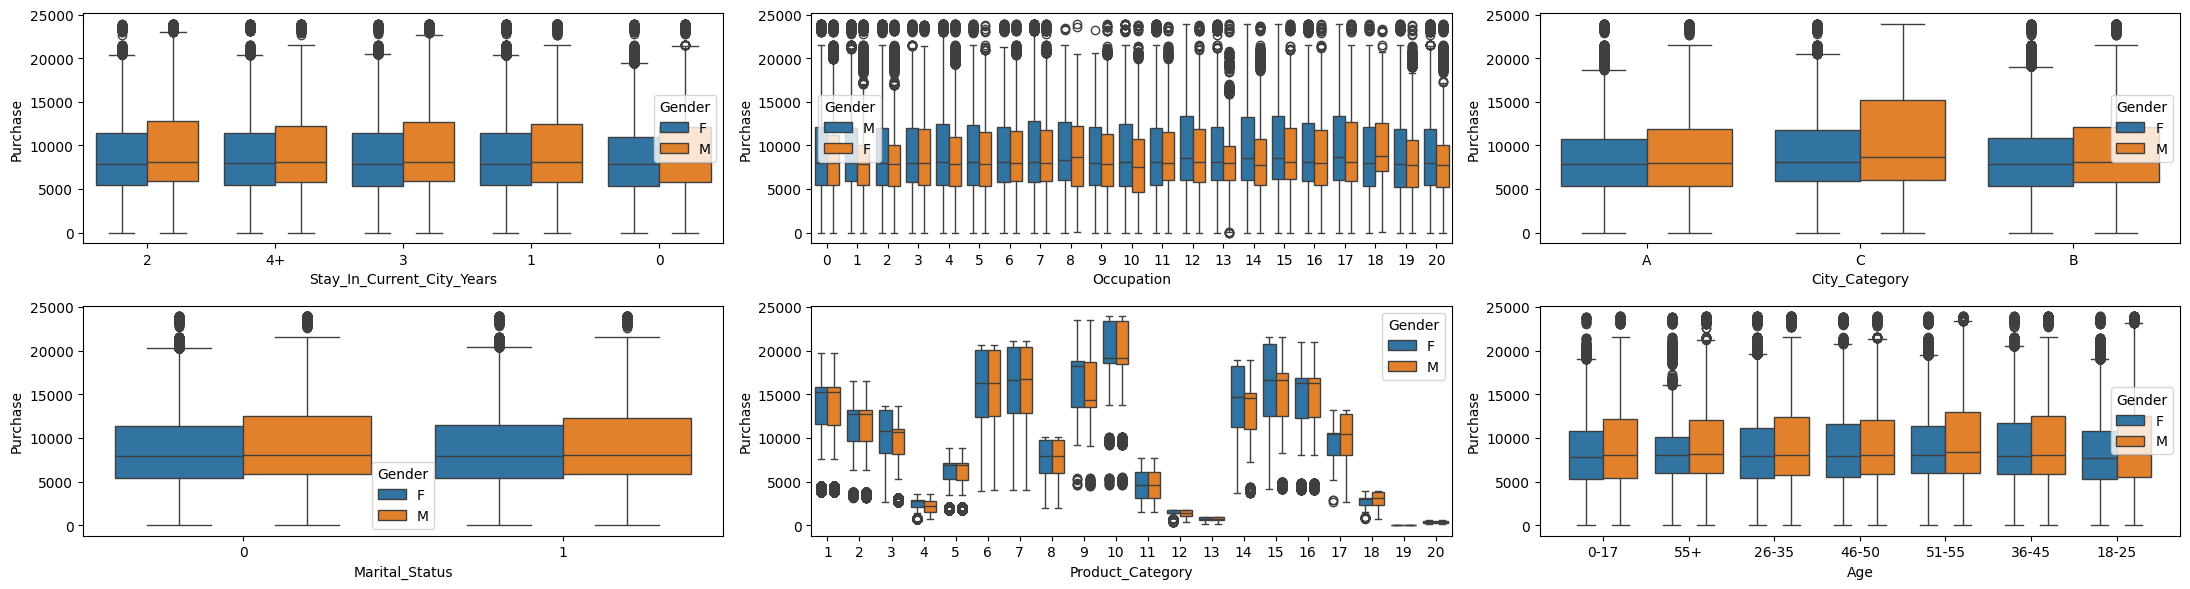

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (22,6))
categorical_cols = ['Stay_In_Current_City_Years', 'Occupation','City_Category','Marital_Status','Product_Category', 'Age']
axs = axs.flatten()
for i, col in enumerate(categorical_cols):
  sns.boxplot(data = df, x = col, y = 'Purchase', hue='Gender', ax = axs[i])

plt.tight_layout()
plt.plot()

**Insight:** We use _box plot_ and _count plot_ to see the relations between two columns of the dataset.

#### Multivariate Analysis

In [ ]:
pivot_table = df.pivot_table(index = 'Age', columns = 'Product_Category', values='Purchase')
pivot_table

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,13607.600279,10851.982609,9431.505000,2244.659631,6249.356120,15982.842105,15490.830189,7632.767493,15434.875000,20038.495495,4808.166216,1423.712000,737.258929,13134.025641,15984.587500,14635.951965,10143.833333,2766.777778,38.491525,368.011111
18-25,13448.852904,10966.741870,9871.727601,2194.358912,6142.584040,15768.623900,16062.850312,7387.642287,17127.650794,19192.218905,4597.116163,1273.038724,701.903439,12704.517391,14358.240234,13993.362328,9476.487805,2909.808260,36.047273,367.253731
26-35,13456.256056,11083.914427,10154.785043,2340.182729,6176.736014,15758.713848,16341.205330,7400.653900,15673.753247,19560.216004,4677.053069,1322.249088,716.744752,12781.127660,14525.945616,14698.257649,9829.015748,3039.208253,36.836590,376.505568
36-45,13767.068287,11375.946254,10340.294240,2400.508496,6283.077612,15803.359323,16450.993820,7528.592033,14689.448598,19651.978138,4762.744195,1350.266600,719.819200,13523.483974,14966.862366,14968.702302,10111.229630,2948.787749,37.025000,364.104743
46-50,13778.098148,11479.071734,10261.654797,2420.013131,6372.036672,15916.663379,16619.957187,7532.639452,14759.393939,19654.736538,4742.285171,1383.450000,730.704174,13117.140940,14709.913621,15186.213879,10296.610526,2896.242165,37.053691,384.180617
51-55,14125.773014,11901.649635,10327.424242,2445.980826,6502.194885,16227.108276,16376.913534,7772.095824,14576.689655,20530.747592,4628.307270,1380.413395,762.842650,14161.207792,16021.627953,15629.892857,10538.009346,2964.732861,37.910448,361.800000
55+,14065.121741,12180.648619,10166.398357,2387.732704,6463.649339,16218.627610,16942.664179,7892.292043,18626.375000,19828.285714,4640.276292,1431.038235,738.362126,13563.560000,14759.820961,15290.127321,10600.805970,2993.800830,38.893204,359.100000


[]

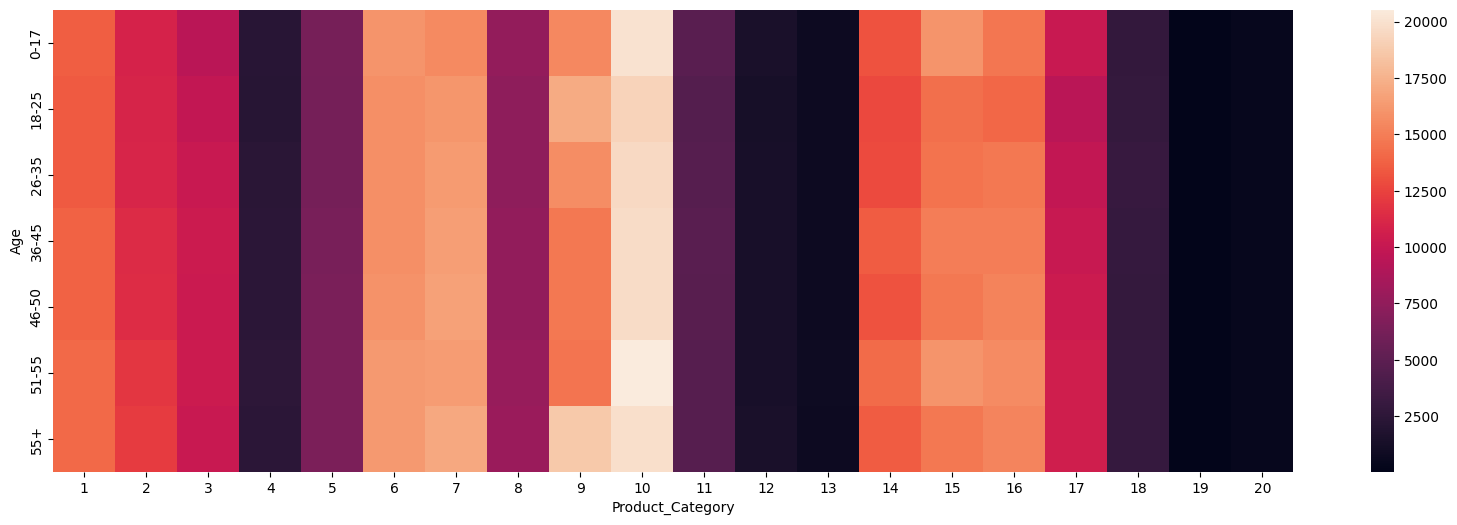

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(pivot_table)
plt.plot()

**Insight:** Here we have used a **heat map** to show the relationship between `Age`, `Product_Category` and `Purchase`. In order to accomplish this we do use the `pivot function` to create the required table.

### Answering Questions

#### How does gender affect the amount spent?

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
amt_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

In [ ]:
male_customers = amt_df[amt_df['Gender'] == 'M']
female_customers = amt_df[amt_df['Gender'] == 'F']
male_customers_average = male_customers.Purchase.mean()
female_customers_average = female_customers.Purchase.mean()
male_customers_std_div = male_customers.Purchase.std()
female_customers_std_div = female_customers.Purchase.std()
print('The avg amount spent by male customers is: ', '{:.2f}'.format(male_customers_average), ' and the standard deviation is: ', '{:.2F}'.format(male_customers_std_div))
print('The avg amount spent by female customers is: ', '{:.2f}'.format(female_customers_average), ' and the standard deviation is: ', '{:.2F}'.format(female_customers_std_div))

The avg amount spent by male customers is:  925344.40  and the standard deviation is:  985830.10
The avg amount spent by female customers is:  712024.39  and the standard deviation is:  807370.73


For sample size = 300

The Sample mean for male customers is:  925,009.52
The Sample mean for female customers is:  714,108.44
The male confidence interval is:  [831389.51, 1018629.54]
The female confidence interval is:  [831389.51, 1018629.54]


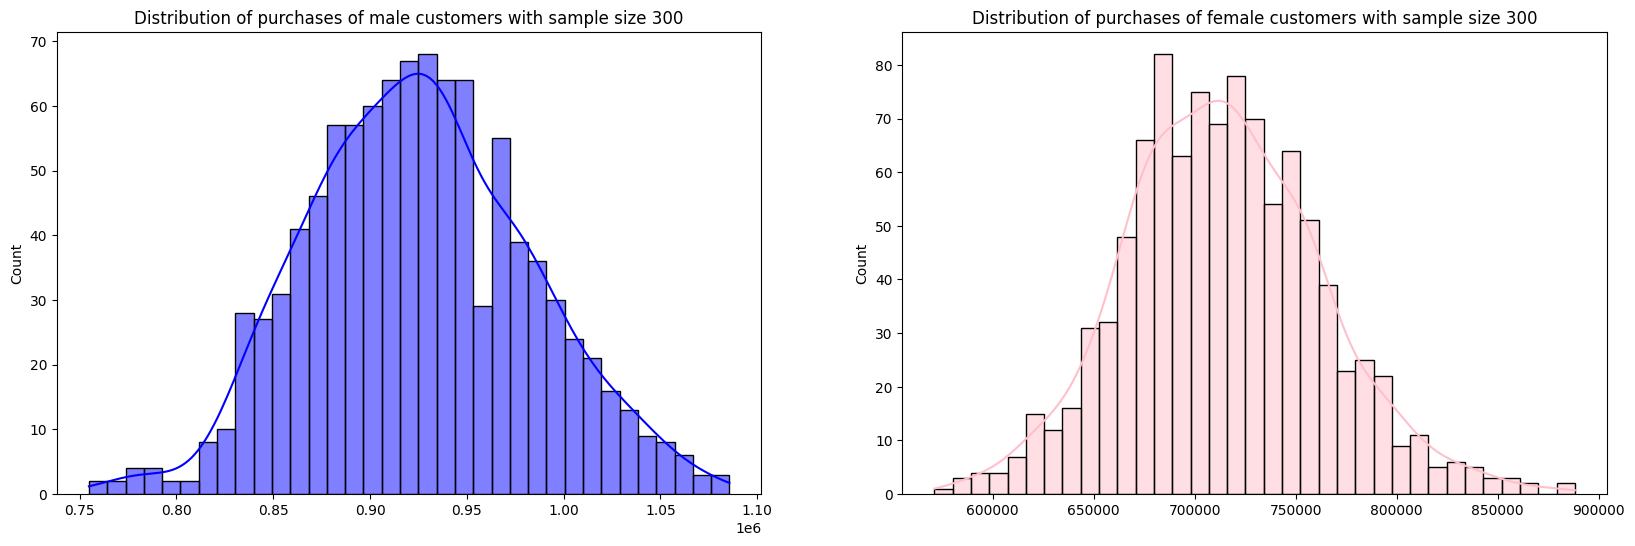

In [ ]:
sample_size_300 = 300

male_sample_mean = [np.mean(male_customers.Purchase.sample(sample_size_300,replace = True)) for i in range(1000)]
female_sample_mean = [np.mean(female_customers.Purchase.sample(sample_size_300, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = male_sample_mean, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = female_sample_mean, bins = 35, color = 'pink', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of male customers with sample size 300')
axes[1].set_title('Distribution of purchases of female customers with sample size 300')
plt.plot()
print('The Sample mean for male customers is: ', '{:,.2f}'.format(np.mean(male_sample_mean)))
print('The Sample mean for female customers is: ', '{:,.2f}'.format(np.mean(female_sample_mean)))

z = norm.ppf(0.95)
male_sample_error = (male_customers_std_div/np.sqrt(sample_size_300)*z)
female_sample_error = (female_customers_std_div/np.sqrt(sample_size_300)*z)

male_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]
female_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]

print('The male confidence interval is: ', male_confidence_interval)
print('The female confidence interval is: ', female_confidence_interval)

For sample size = 3000

The Sample mean for male customers is:  925,591.92
The Sample mean for female customers is:  711,603.70
The male confidence interval is:  [895986.67, 955197.17]
The female confidence interval is:  [895986.67, 955197.17]


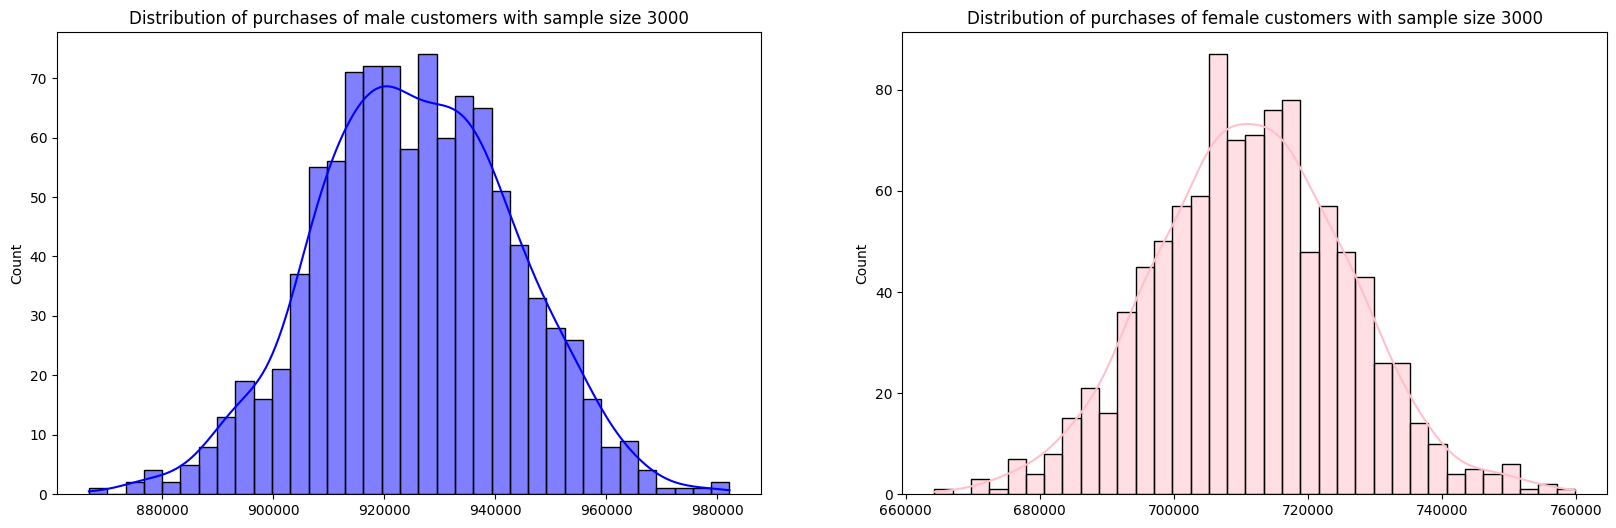

In [ ]:
sample_size_3000 = 3000

male_sample_mean = [np.mean(male_customers.Purchase.sample(sample_size_3000,replace = True)) for i in range(1000)]
female_sample_mean = [np.mean(female_customers.Purchase.sample(sample_size_3000, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = male_sample_mean, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = female_sample_mean, bins = 35, color = 'pink', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of male customers with sample size 3000')
axes[1].set_title('Distribution of purchases of female customers with sample size 3000')
plt.plot()

print('The Sample mean for male customers is: ', '{:,.2f}'.format(np.mean(male_sample_mean)))
print('The Sample mean for female customers is: ', '{:,.2f}'.format(np.mean(female_sample_mean)))

z = norm.ppf(0.95)
male_sample_error = (male_customers_std_div/np.sqrt(sample_size_3000)*z)
female_sample_error = (female_customers_std_div/np.sqrt(sample_size_3000)*z)

male_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]
female_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]

print('The male confidence interval is: ', male_confidence_interval)
print('The female confidence interval is: ', female_confidence_interval)

For sample size = 30000

The Sample mean for male customers is:  925,591.92
The Sample mean for female customers is:  711,603.70
The male confidence interval is:  [916229.92, 934953.92]
The female confidence interval is:  [916229.92, 934953.92]


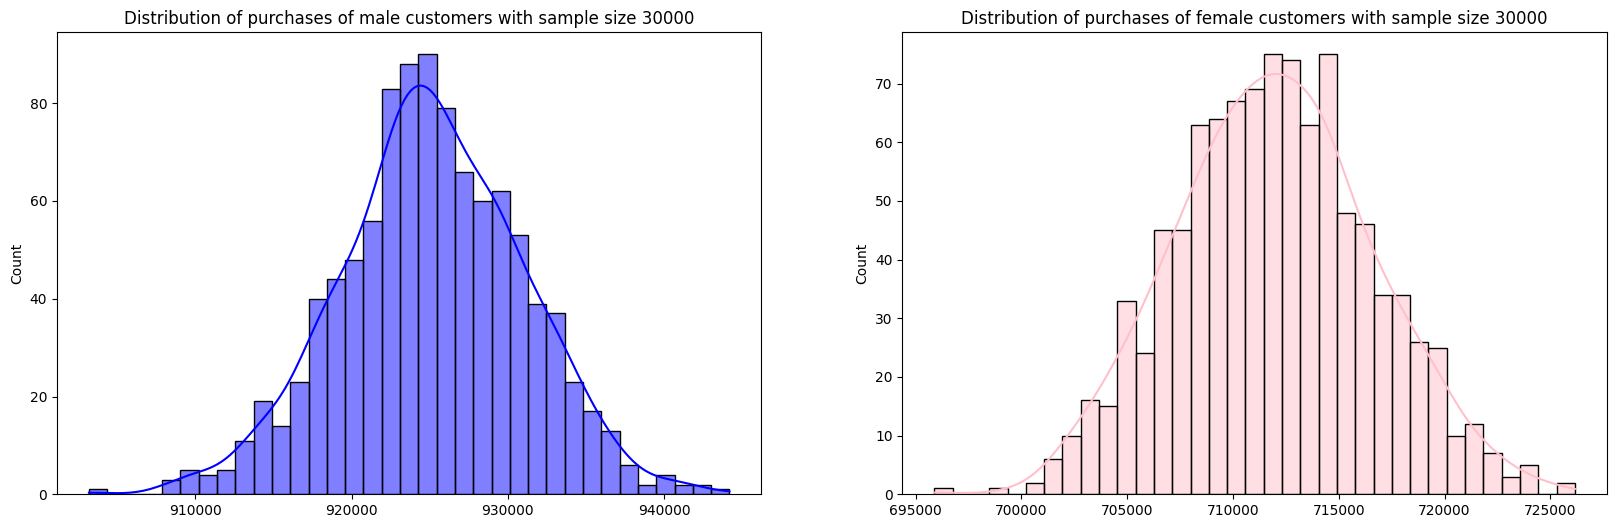

In [ ]:
sample_size_30000 = 30000

male_sample_mean_30000 = [np.mean(male_customers.Purchase.sample(sample_size_30000,replace = True)) for i in range(1000)]
female_sample_mean_30000 = [np.mean(female_customers.Purchase.sample(sample_size_30000, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = male_sample_mean_30000, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = female_sample_mean_30000, bins = 35, color = 'pink', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of male customers with sample size 30000')
axes[1].set_title('Distribution of purchases of female customers with sample size 30000')
plt.plot()

print('The Sample mean for male customers is: ', '{:,.2f}'.format(np.mean(male_sample_mean)))
print('The Sample mean for female customers is: ', '{:,.2f}'.format(np.mean(female_sample_mean)))

z = norm.ppf(0.95)
male_sample_error = (male_customers_std_div/np.sqrt(sample_size_30000)*z)
female_sample_error = (female_customers_std_div/np.sqrt(sample_size_30000)*z)

male_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]
female_confidence_interval = [float('{:.2f}'.format(np.mean(male_sample_mean) - male_sample_error)), float('{:.2f}'.format(np.mean(male_sample_mean)+male_sample_error))]

print('The male confidence interval is: ', male_confidence_interval)
print('The female confidence interval is: ', female_confidence_interval)

#### How does Marital_Status affect the amount spent?

In [ ]:
amt_by_marriage = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
amt_by_marriage = amt_by_marriage.reset_index()
amt_by_marriage.head()

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


In [ ]:
amt_by_marriage['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

In [ ]:
avg_money_spent_by_married_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 1]['Purchase'].mean()
avg_money_spent_by_unmarried_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 0]['Purchase'].mean()

print('The average amount spent by married customers per transaction is: ', '{:.2f}'.format(avg_money_spent_by_married_customers))
print('The average amount spent by unmarried customers per transaction is: ', '{:.2f}'.format(avg_money_spent_by_unmarried_customers))

The average amount spent by married customers per transaction is:  843526.80
The average amount spent by unmarried customers per transaction is:  880575.78


For sample size 300

The average of purchases of married customers per transaction is: 843,526.80 along with standard deviation 935,352.12
The average of purchases of unmarried customers per transaction is: 880,575.78 along with standard deviation 949,436.25
The average of sample mean of married customers' per transaction is:  844,971.38  along with sample standard deviation:  54,002.58
The average of sample mean of unmarried customers' per transaction is:  879,720.02  along with sample standard deviation:  54,815.73
The married confidence interval is:  [756145.0458934325, 933797.7236865674]
The unmarried confidence interval is:  [789556.1760795076, 969883.8722204923]


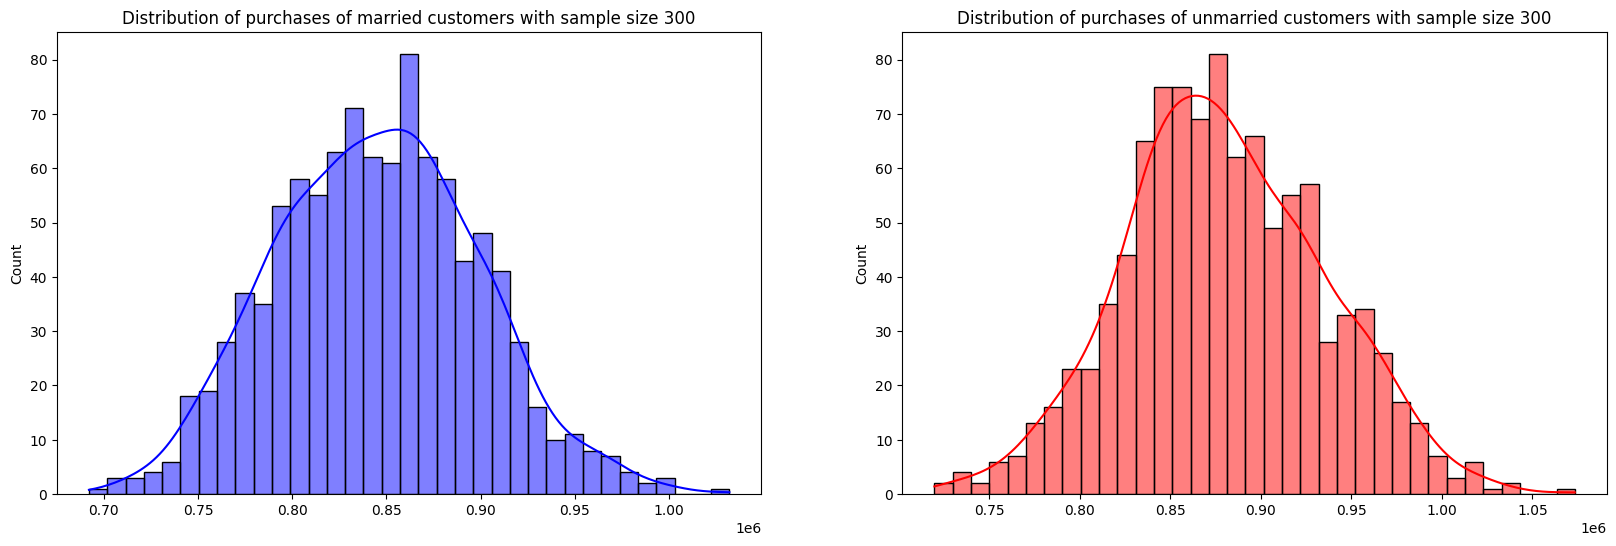

In [ ]:
married_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 1]
unmarried_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 0]

sample_size_300 = 300

married_samples = [np.mean(married_customers['Purchase'].sample(sample_size_300, replace = True)) for i in range(1000)]
unmarried_samples = [np.mean(unmarried_customers['Purchase'].sample(sample_size_300, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = married_samples, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = unmarried_samples, bins = 35, color = 'red', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of married customers with sample size 300')
axes[1].set_title('Distribution of purchases of unmarried customers with sample size 300')
plt.plot()

married_standard_div = married_customers['Purchase'].std()
unmarried_standard_div = unmarried_customers['Purchase'].std()
sample_married_standard_div = married_standard_div/(np.sqrt(sample_size_300))
sample_unmarried_standard_div = unmarried_standard_div/(np.sqrt(sample_size_300))

print(f'The average of purchases of married customers per transaction is: {np.mean(married_customers.Purchase):,.2f} along with standard deviation {married_standard_div:,.2F}')
print(f'The average of purchases of unmarried customers per transaction is: {np.mean(unmarried_customers.Purchase):,.2F} along with standard deviation {unmarried_standard_div:,.2F}')

print('The average of sample mean of married customers\' per transaction is: ', '{:,.2F}'.format(np.mean(married_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_married_standard_div))
print('The average of sample mean of unmarried customers\' per transaction is: ', '{:,.2F}'.format(np.mean(unmarried_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_unmarried_standard_div))

z = norm.ppf(0.95)
married_sample_error = (sample_married_standard_div*z)
unmarried_sample_error = (sample_unmarried_standard_div*z)
married_confidence_interval = [np.mean(married_samples) - married_sample_error, np.mean(married_samples) + married_sample_error]
unmarried_confidence_interval = [np.mean(unmarried_samples) - unmarried_sample_error, np.mean(unmarried_samples) + unmarried_sample_error]

print('The married confidence interval is: ', married_confidence_interval)
print('The unmarried confidence interval is: ', unmarried_confidence_interval)

For sample size 3000

The average of purchases of married customers per transaction is: 843,526.80 along with standard deviation 935,352.12
The average of purchases of unmarried customers per transaction is: 880,575.78 along with standard deviation 949,436.25
The average of sample mean of married customers' per transaction is:  842,432.75  along with sample standard deviation:  54,002.58
The average of sample mean of unmarried customers' per transaction is:  880,271.04  along with sample standard deviation:  54,815.73
The married confidence interval is:  [753606.4153897659, 931259.0931829008]
The unmarried confidence interval is:  [790107.1936185076, 970434.8897594924]


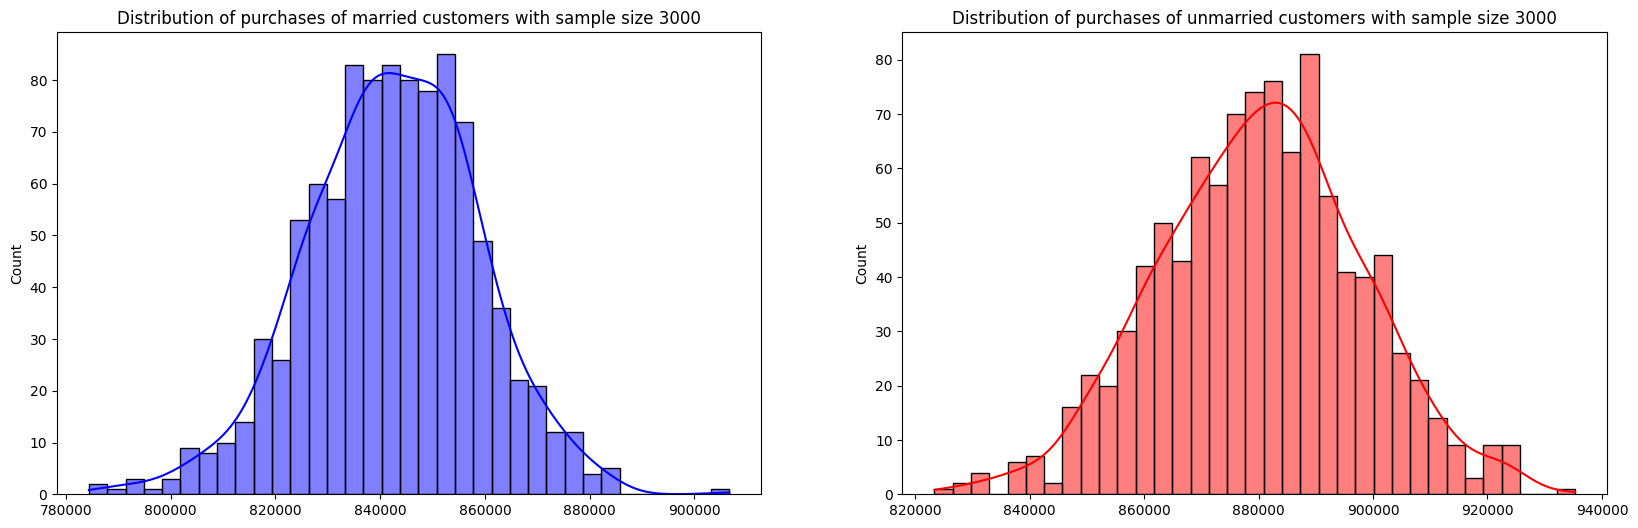

In [ ]:
married_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 1]
unmarried_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 0]

sample_size_3000 = 3000

married_samples = [np.mean(married_customers['Purchase'].sample(sample_size_3000, replace = True)) for i in range(1000)]
unmarried_samples = [np.mean(unmarried_customers['Purchase'].sample(sample_size_3000, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = married_samples, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = unmarried_samples, bins = 35, color = 'red', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of married customers with sample size 3000')
axes[1].set_title('Distribution of purchases of unmarried customers with sample size 3000')
plt.plot()

married_standard_div = married_customers['Purchase'].std()
unmarried_standard_div = unmarried_customers['Purchase'].std()
sample_married_standard_div = married_standard_div/(np.sqrt(sample_size_300))
sample_unmarried_standard_div = unmarried_standard_div/(np.sqrt(sample_size_300))

print(f'The average of purchases of married customers per transaction is: {np.mean(married_customers.Purchase):,.2f} along with standard deviation {married_standard_div:,.2F}')
print(f'The average of purchases of unmarried customers per transaction is: {np.mean(unmarried_customers.Purchase):,.2F} along with standard deviation {unmarried_standard_div:,.2F}')

print('The average of sample mean of married customers\' per transaction is: ', '{:,.2F}'.format(np.mean(married_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_married_standard_div))
print('The average of sample mean of unmarried customers\' per transaction is: ', '{:,.2F}'.format(np.mean(unmarried_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_unmarried_standard_div))

z = norm.ppf(0.95)
married_sample_error = (sample_married_standard_div*z)
unmarried_sample_error = (sample_unmarried_standard_div*z)
married_confidence_interval = [np.mean(married_samples) - married_sample_error, np.mean(married_samples) + married_sample_error]
unmarried_confidence_interval = [np.mean(unmarried_samples) - unmarried_sample_error, np.mean(unmarried_samples) + unmarried_sample_error]

print('The married confidence interval is: ', married_confidence_interval)
print('The unmarried confidence interval is: ', unmarried_confidence_interval)

For sample size 30000

The average of purchases of married customers per transaction is: 843,526.80 along with standard deviation 935,352.12
The average of purchases of unmarried customers per transaction is: 880,575.78 along with standard deviation 949,436.25
The average of sample mean of married customers' per transaction is:  843,313.38  along with sample standard deviation:  54,002.58
The average of sample mean of unmarried customers' per transaction is:  880,500.58  along with sample standard deviation:  54,815.73
The married confidence interval is:  [754487.0408156659, 932139.7186088008]
The unmarried confidence interval is:  [790336.731668741, 970664.4278097257]


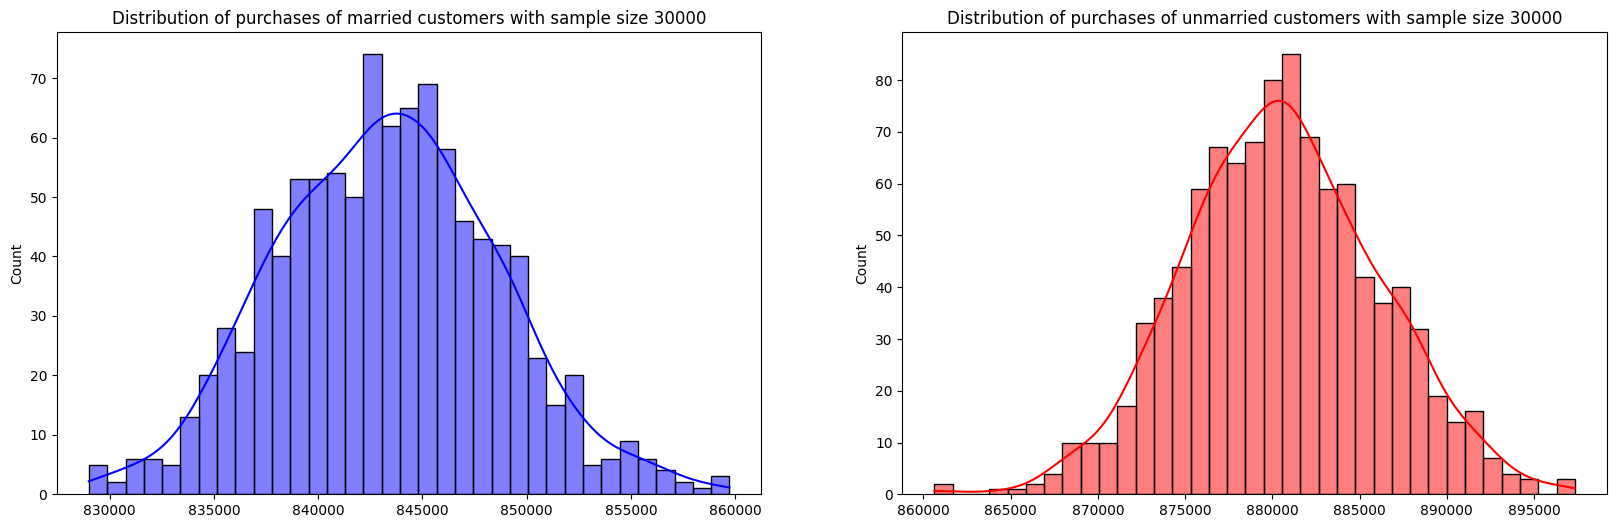

In [ ]:
married_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 1]
unmarried_customers = amt_by_marriage[amt_by_marriage['Marital_Status'] == 0]

sample_size_30000 = 30000

married_samples = [np.mean(married_customers['Purchase'].sample(sample_size_30000, replace = True)) for i in range(1000)]
unmarried_samples = [np.mean(unmarried_customers['Purchase'].sample(sample_size_30000, replace = True)) for i in range(1000)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(data = married_samples, bins = 35, color = 'blue', kde = True, ax = axes[0])
sns.histplot(data = unmarried_samples, bins = 35, color = 'red', kde = True, ax = axes[1])
axes[0].set_title('Distribution of purchases of married customers with sample size 30000')
axes[1].set_title('Distribution of purchases of unmarried customers with sample size 30000')
plt.plot()

married_standard_div = married_customers['Purchase'].std()
unmarried_standard_div = unmarried_customers['Purchase'].std()
sample_married_standard_div = married_standard_div/(np.sqrt(sample_size_300))
sample_unmarried_standard_div = unmarried_standard_div/(np.sqrt(sample_size_300))

print(f'The average of purchases of married customers per transaction is: {np.mean(married_customers.Purchase):,.2f} along with standard deviation {married_standard_div:,.2F}')
print(f'The average of purchases of unmarried customers per transaction is: {np.mean(unmarried_customers.Purchase):,.2F} along with standard deviation {unmarried_standard_div:,.2F}')

print('The average of sample mean of married customers\' per transaction is: ', '{:,.2F}'.format(np.mean(married_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_married_standard_div))
print('The average of sample mean of unmarried customers\' per transaction is: ', '{:,.2F}'.format(np.mean(unmarried_samples)), ' along with sample standard deviation: ', '{:,.2F}'.format(sample_unmarried_standard_div))

z = norm.ppf(0.95)
married_sample_error = (sample_married_standard_div*z)
unmarried_sample_error = (sample_unmarried_standard_div*z)
married_confidence_interval = [np.mean(married_samples) - married_sample_error, np.mean(married_samples) + married_sample_error]
unmarried_confidence_interval = [np.mean(unmarried_samples) - unmarried_sample_error, np.mean(unmarried_samples) + unmarried_sample_error]

print('The married confidence interval is: ', married_confidence_interval)
print('The unmarried confidence interval is: ', unmarried_confidence_interval)

#### How does Age affect the amount spent?

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])['Purchase'].sum()

In [ ]:
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [ ]:
amt_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

For sample size 300

In [ ]:
sample_size = 300
n = 1500
all_means = {}
age_groups = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

for age in age_groups:
  all_means[age] = []

for age in age_groups:
  for _ in range(n):
    sample_mean = np.mean(amt_df[amt_df['Age'] == age]['Purchase'].sample(sample_size, replace=True))
    all_means[age].append(sample_mean)


for age in age_groups:
  new_df = amt_df[amt_df['Age'] == age]
  sample_mean = np.mean(all_means[age])
  sample_error = 1.96*((new_df['Purchase'].std())/np.sqrt(len(new_df)))
  upper_limit = sample_mean + sample_error
  lower_limit = sample_mean - sample_error
  print('For age group ', age, ' the condience interval is: ', (float('{:.2F}'.format(lower_limit)), float('{:.2F}'.format(upper_limit))))

For age group  0-17  the condience interval is:  (526856.68, 709267.39)
For age group  55+  the condience interval is:  (478269.51, 603767.48)
For age group  26-35  the condience interval is:  (941833.37, 1031083.16)
For age group  46-50  the condience interval is:  (713414.77, 871501.06)
For age group  51-55  the condience interval is:  (691345.12, 832962.11)
For age group  36-45  the condience interval is:  (823371.42, 936007.24)
For age group  18-25  the condience interval is:  (800194.48, 906655.17)


For sample size 3000

In [ ]:
sample_size = 3000
n = 1000
all_means = {}
age_groups = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

for age in age_groups:
  all_means[age] = []

for age in age_groups:
  for _ in range(n):
    sample_mean = np.mean(amt_df[amt_df['Age'] == age]['Purchase'].sample(sample_size, replace = True))
    all_means[age].append(sample_mean)


for age in age_groups:
  new_df = amt_df[amt_df['Age'] == age]
  sample_mean = np.mean(all_means[age])
  sample_error = 1.96*((new_df['Purchase'].std())/np.sqrt(len(new_df)))
  upper_limit = sample_mean + sample_error
  lower_limit = sample_mean - sample_error
  print('For age group ', age, ' the condience interval is: ', (float('{:.2F}'.format(lower_limit)), float('{:.2F}'.format(upper_limit))))

For age group  0-17  the condience interval is:  (527299.09, 709709.8)
For age group  55+  the condience interval is:  (476620.87, 602118.84)
For age group  26-35  the condience interval is:  (943794.36, 1033044.15)
For age group  46-50  the condience interval is:  (713229.84, 871316.14)
For age group  51-55  the condience interval is:  (693371.55, 834988.54)
For age group  36-45  the condience interval is:  (823513.07, 936148.88)
For age group  18-25  the condience interval is:  (801393.39, 907854.08)


In [ ]:
sample_size = 30000
n = 1000
all_means = {}
age_groups = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

for age in age_groups:
  all_means[age] = []

for age in age_groups:
  for _ in range(n):
    sample_mean = np.mean(amt_df[amt_df['Age'] == age]['Purchase'].sample(sample_size, replace = True))
    all_means[age].append(sample_mean)


for age in age_groups:
  new_df = amt_df[amt_df['Age'] == age]
  sample_mean = sample_mean.mean()
  sample_error = 1.96*((new_df['Purchase'].std())/np.sqrt(len(new_df)))
  upper_limit = sample_mean + sample_error
  lower_limit = sample_mean - sample_error
  print('For age group ', age, ' the condience interval is: ', (float('{:.2F}'.format(lower_limit)), float('{:.2F}'.format(upper_limit))))

For age group  0-17  the condience interval is:  (755739.06, 938149.77)
For age group  55+  the condience interval is:  (784195.43, 909693.4)
For age group  26-35  the condience interval is:  (802319.52, 891569.31)
For age group  46-50  the condience interval is:  (767901.27, 925987.56)
For age group  51-55  the condience interval is:  (776135.92, 917752.91)
For age group  36-45  the condience interval is:  (790626.51, 903262.32)
For age group  18-25  the condience interval is:  (793714.07, 900174.76)


### Insights and Conclusions

- There are no null values present in the dataset.
- Most purchases have been done for amount between **5000** and **10000**.
- Most customers ate walmart are **Males**.
- _Single_ customers tend to buy more than _married_ customers.
- **B** is the most popular category for purchases followed by **C** and **A**.
- The age group between `26-35` made the highest purchases according to the pie chart.
- The most popular product categories are `1`, `5`, `8` and `11`.

#### CLT and Distribution analysis for Gender v/s Product.
- For sample size 300, the confidence interval for male customers with 95% confidence interval is `[831292.75, 1018532.78]` and for females it is `[831292.75, 1018532.78]`.
- For sample size 3000, the confidence interval for male customers with 95% confidence interval is `[896725.81, 955936.31]` and for females it is `[896725.81, 955936.31]`.
- For sample size 30000, he confidence interval for male customers with 95% confidence interval is `[916969.06, 935693.06]` and for females it is `[916969.06, 935693.06]`.  

This means 95 times out of 100, the average amount spent by male customers which is 926,331.06 and by female customers, 712,403.58 will lie between the respective intervals of the sample sizes 300, 3000 and 30000.  

#### CLT and Distribution analysis for married customers and unmarried customers.
- For sample size 300, the confidence interval for married customers with 95% confidence interval is `[754996.1616934325, 932648.8394865674]` and for unmarried it is `[791471.7544595075, 971799.4506004923]`.
- For sample size 3000, the confidence interval for married customers with 95% confidence interval is `[755624.184450766, 933276.8622439009]` and for unmarried it is `[791242.8458675076, 971570.5420084924]`.
- For sample size 30000, he confidence interval for male customers with 95% confidence interval is `[754568.2149232992, 932220.8927164341]` and for females it is `[790263.0356384744, 970590.7317794592]`.  

This means 95 times out of 100, The average amount spent by married customers per transaction which is 843526.80 and by unmarried customers per transaction which is 880575.78 will lie between the respective intervals of the sample sizes 300, 3000 and 30000.

#### How does Age affect the amount spent?
Here because of so many age groups , we have calculated the interval for each age group seperately according to each sample size. These will give us the idea of how an age_group is spread across.

### Recommendations
- Money spent by customers is majorly coming from males. So, company should devise strategies to reach out to females as well.
- Special attention such as careful marketing needs to be done for product categories other than 1, 5, 8 and 11.
- The comapny should aggresively try to promote high end expensive products through combination of discount and quality to boost their sales and increase revenue.
- Age groups with lower percentage of buying products should also be encuraged by company to buy more products.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Business_Case_Walmart.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[NbConvertApp] Converting notebook /content/Business_Case_Walmart.ipynb to pdf
[NbConvertApp] Support files will be in Business_Case_Walmart_files/
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_Walmart_files
[NbConvertApp] Making directory ./Business_Case_